In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import anndata
import string
import gc
from anndata import read_h5ad
from anndata import read_csv
from pandas import DataFrame
import h5py
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import networkx as nx
import plotly.graph_objects as go
import scanpy as sc
import dill

/home/anton.thieme/miniconda3/envs/sc_env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)


In [ ]:
dill.load_session('sessions/002-pairwise_correlation_pca.pkl')

: 

In [ ]:
dill.dump_session('sessions/002-pairwise_correlation_pca.pkl')

## LOAD DATA

In [2]:
adata_tf = read_h5ad(os.path.join('..', 'data', 'adata_tf.h5ad'))
adata_tf_copy = adata_tf.copy()

## CALCULATE PCA

In [3]:
sc.tl.pca(adata_tf_copy, n_comps=50, svd_solver='arpack')
adata_tf_copy.obsm['X_pca']

array([[ 3.441468  ,  4.522237  , -1.2851397 , ...,  0.60081375,
        -0.670879  , -1.107567  ],
       [ 1.7431852 , -3.5806558 ,  5.894796  , ..., -0.0658133 ,
         0.24725899, -0.1055054 ],
       [ 3.7293823 , -1.8634572 ,  5.240303  , ..., -0.38052496,
         0.6495772 , -0.22579733],
       ...,
       [ 7.3735113 ,  1.0802875 ,  3.2002892 , ...,  0.92885613,
        -0.4907385 , -0.50389403],
       [-3.9553823 ,  1.1896985 ,  1.4690025 , ..., -1.2855725 ,
        -0.8527264 , -0.6619931 ],
       [ 2.4677057 ,  0.9412613 , -0.54306126, ...,  0.2692278 ,
         1.4657577 ,  0.7285391 ]], dtype=float32)

## CLUSTERING

In [ ]:
# Compute the neighborhood graph based on PCA
sc.pp.neighbors(adata_tf_copy, n_neighbors=15, n_pcs=30)  # Adjust n_neighbors and n_pcs as needed

# Cluster cells using Leiden algorithm
sc.tl.leiden(adata_tf_copy, resolution=1.0)  # Adjust resolution for desired cluster granularity

/tmp/ipykernel_3768196/2617619722.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_tf_copy, resolution=1.0)  # Adjust resolution for desired cluster granularity


## VISUALIZE

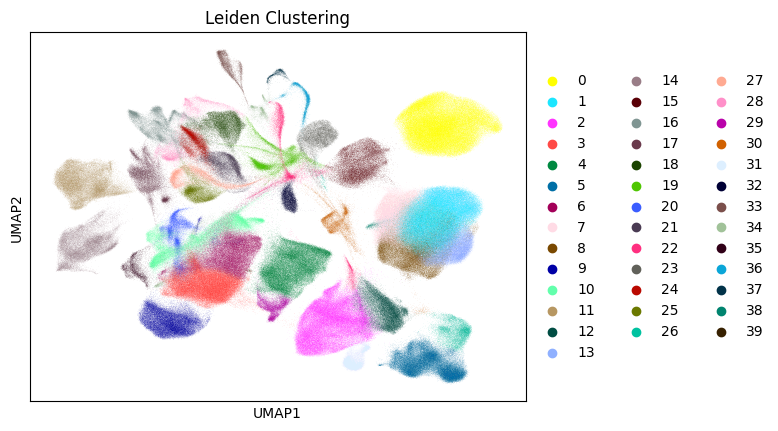

: 

: 

: 

In [5]:
# Compute UMAP
sc.tl.umap(adata_tf_copy)
adata_tf.obsm['X_tf_umap'] = adata_tf_copy.obsm['X_umap']

# Plot UMAP with clusters
sc.pl.umap(adata_tf, color=['leiden'], title='Leiden Clustering', obsm='X_umap')

In [8]:
adata_tf

AnnData object with n_obs × n_vars = 1093048 × 1637
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'sample_number', 'leiden'
    var: 'ensembl_id', 'gene_symbol', 'genome', 'mt', 'ercc', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', '_training_mode', 'age_colors', 'assay_colors', 'compartment_colors', 'donor_colors', 'leiden', 'log1p', 'met

: 

: 

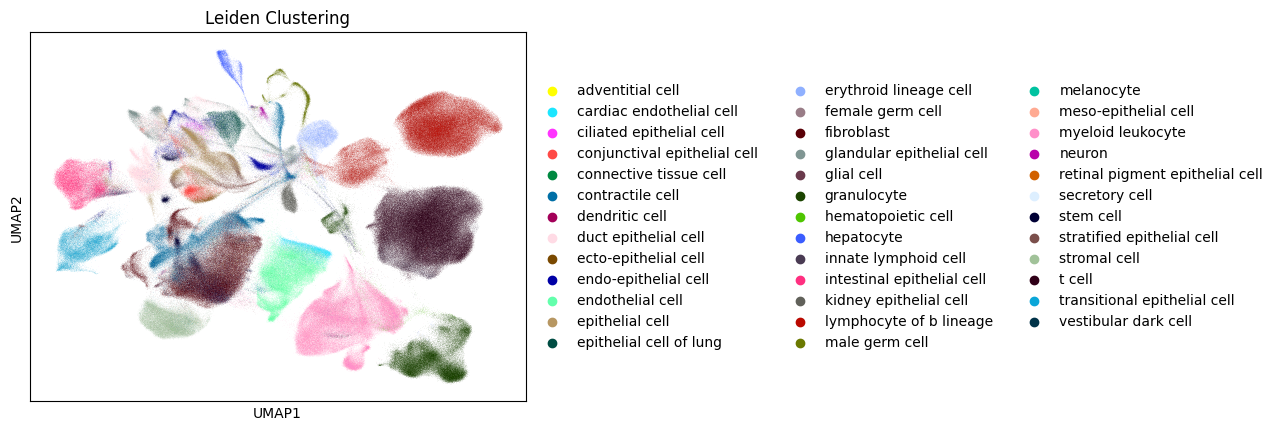

: 

: 

In [9]:
sc.pl.umap(adata_tf, color=['broad_cell_class'], title='Leiden Clustering')

In [9]:
# Generate a heatmap of cluster-specific genes
sc.pl.matrixplot(adata_tf, adata_tf.var_names, groupby='leiden', cmap='viridis')

: 

: 

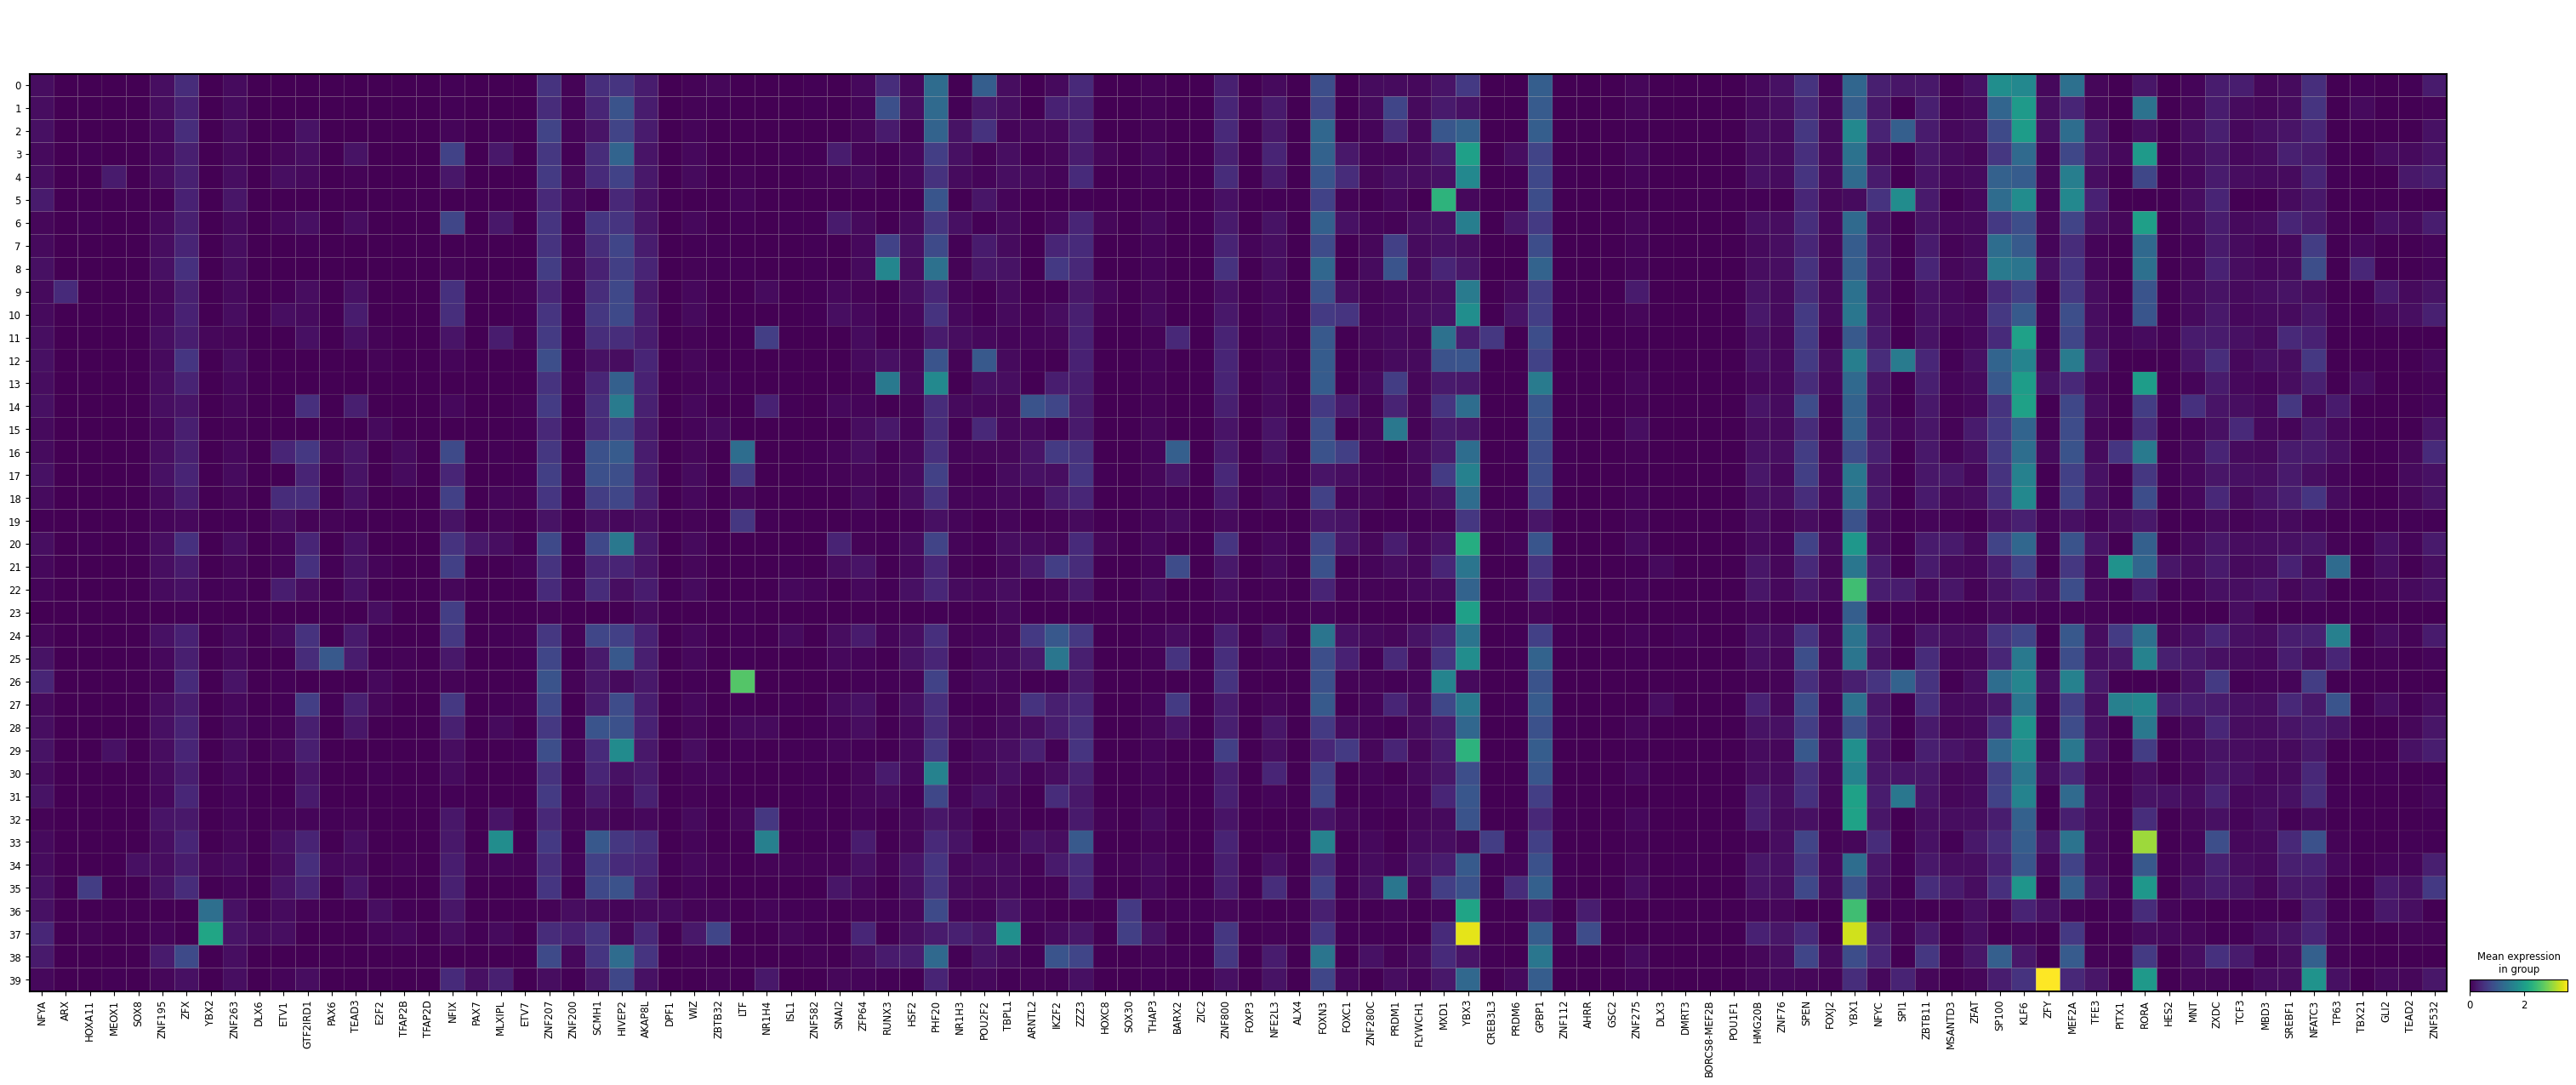

: 

: 

In [10]:
sc.pl.matrixplot(adata_tf, adata_tf.var_names[0:100], groupby='leiden', cmap='viridis')

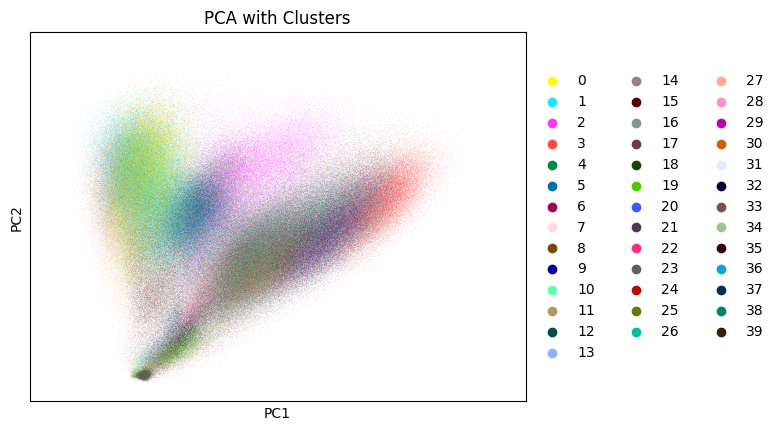

: 

: 

In [12]:
# PCA plot
sc.pl.pca_scatter(adata_tf, color='leiden', title='PCA with Clusters')

<Axes: title={'center': 'Cluster Sizes'}, xlabel='leiden'>

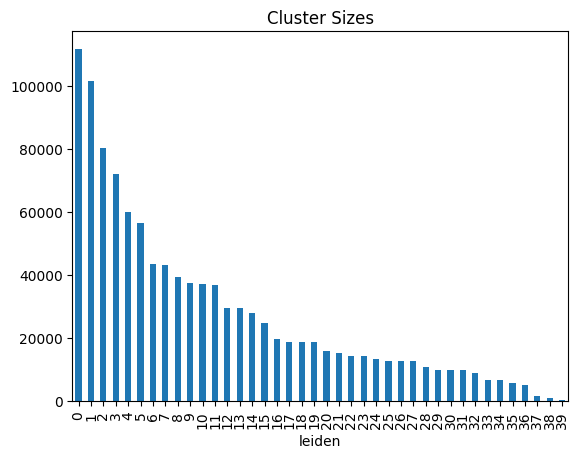

: 

: 

In [13]:
# Cluster sizes
adata_tf.obs['leiden'].value_counts().plot(kind='bar', title='Cluster Sizes')

/home/anton.thieme/miniconda3/envs/sc_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/anton.thieme/miniconda3/envs/sc_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/anton.thieme/miniconda3/envs/sc_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_g

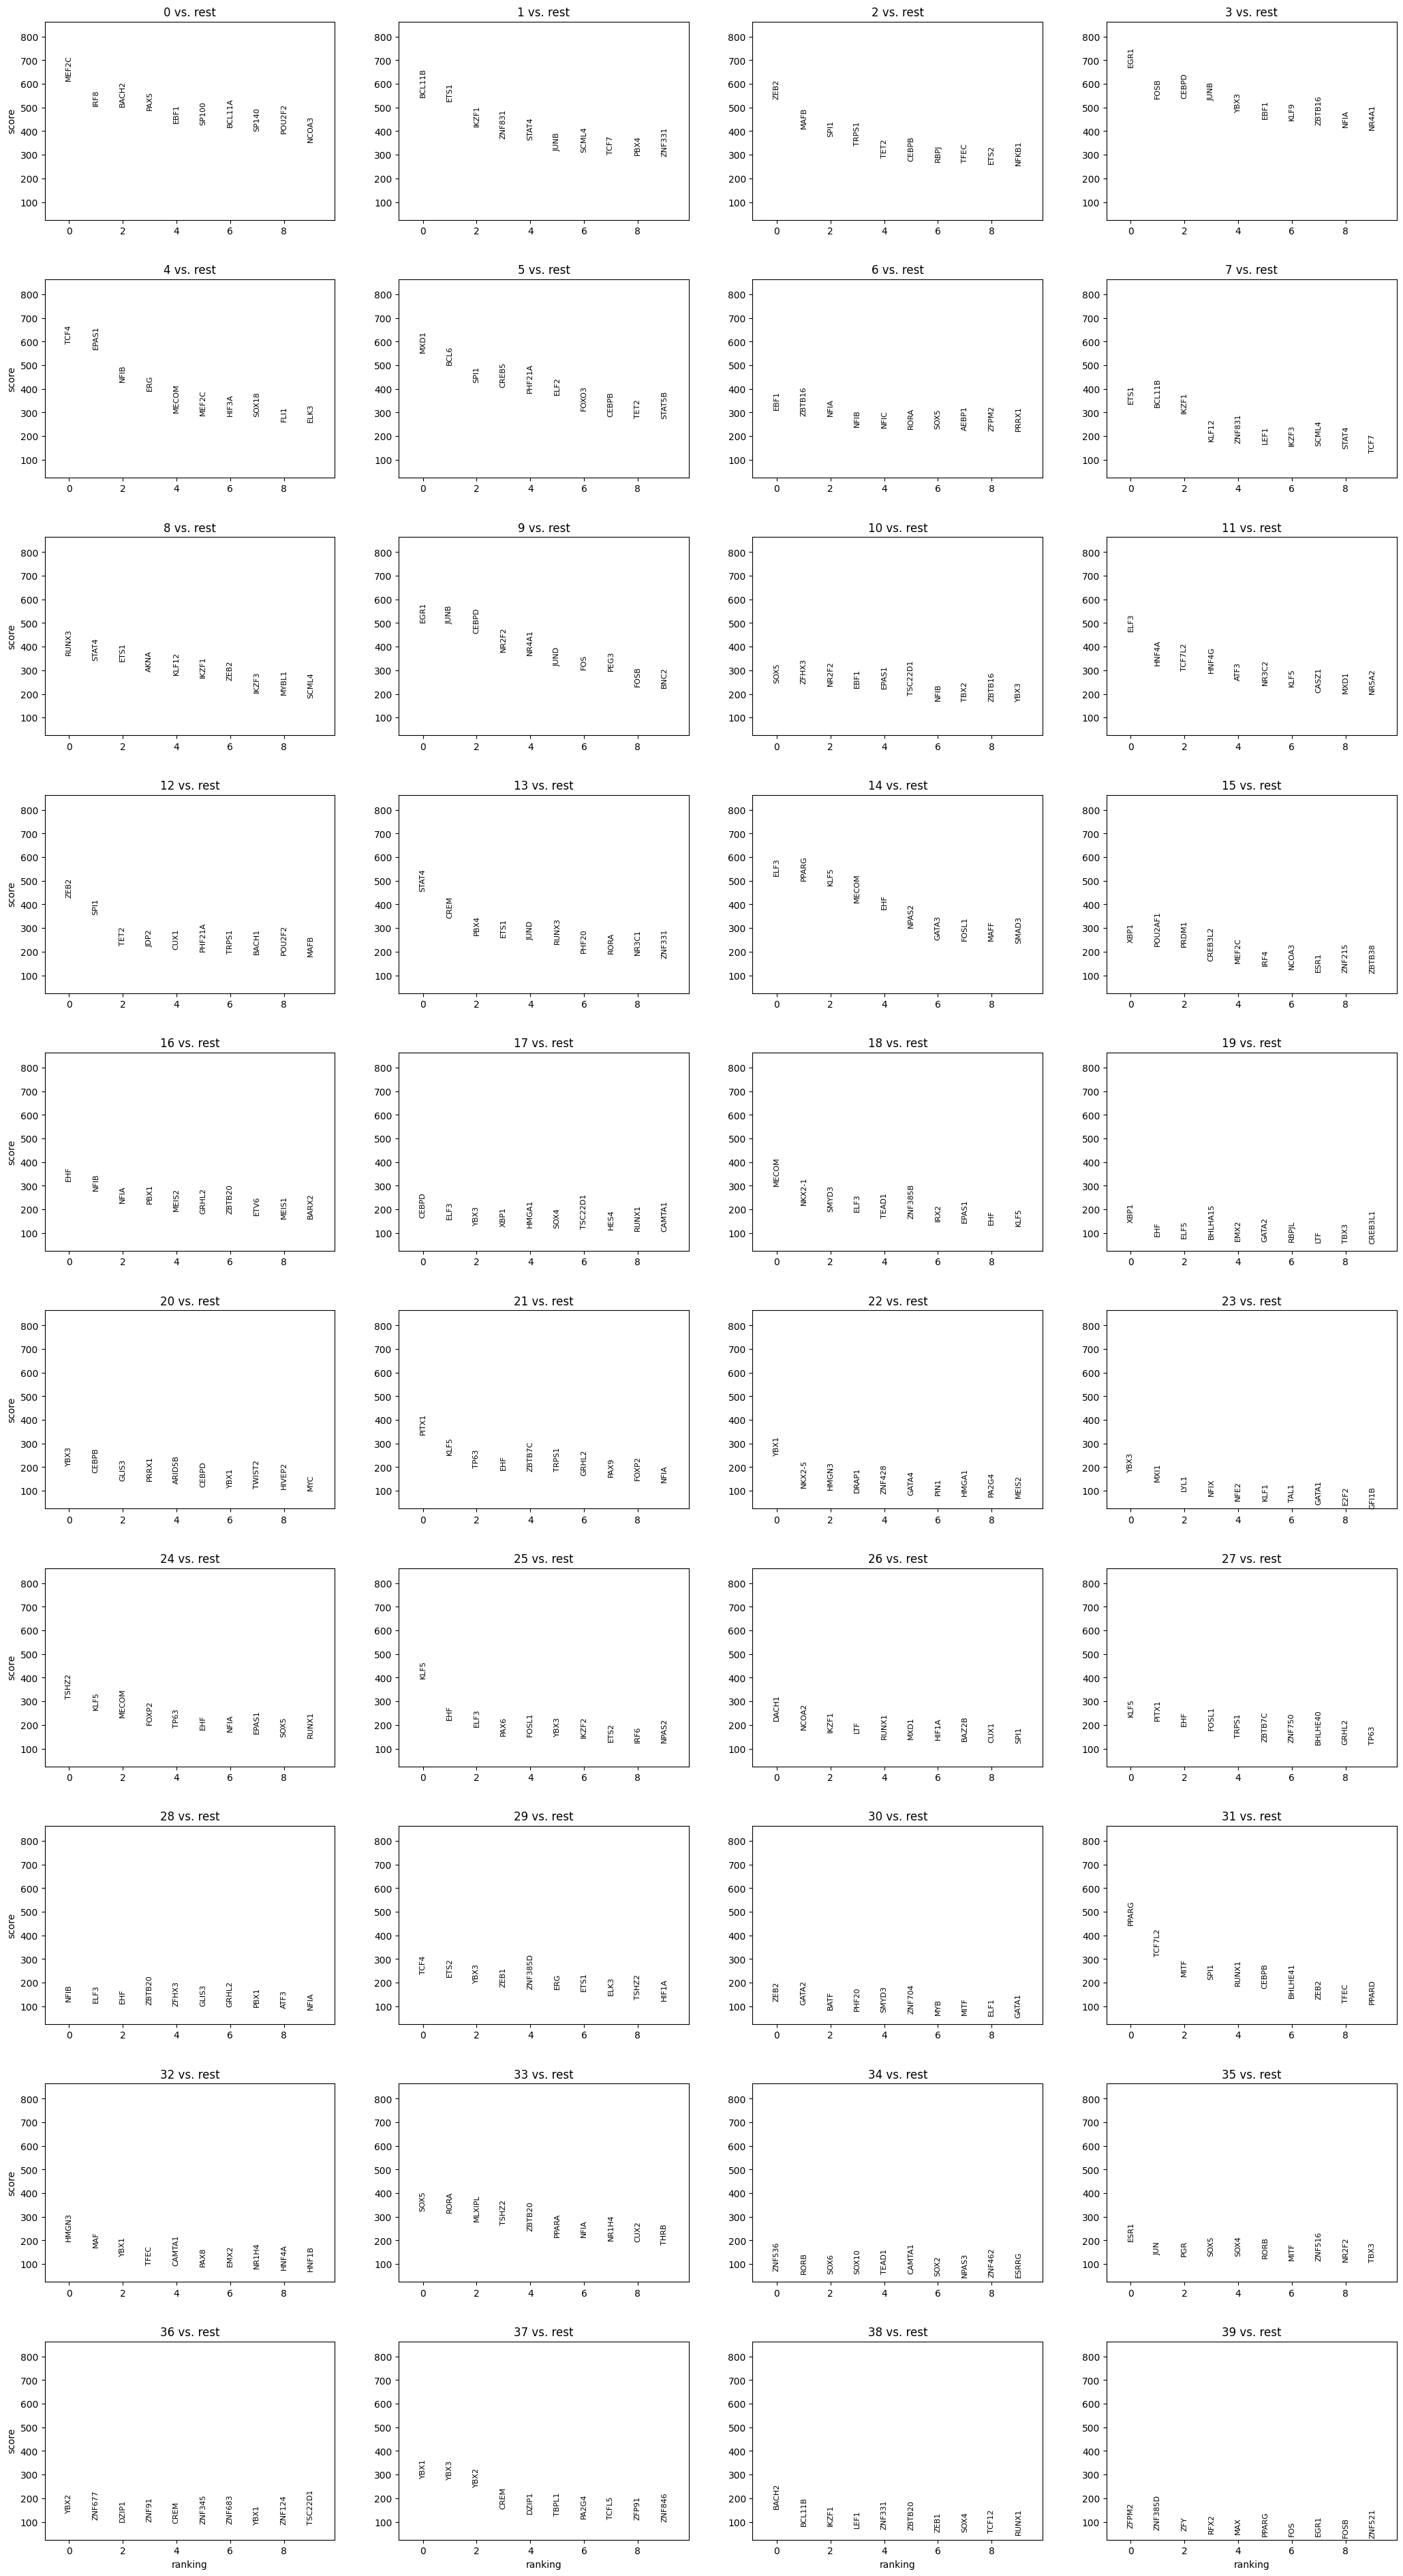

: 

: 

In [14]:
sc.tl.rank_genes_groups(adata_tf, groupby='leiden', method='t-test')
sc.pl.rank_genes_groups(adata_tf, n_genes=10)

In [1]:
adata_tf

NameError: name 'adata_tf' is not defined

: 

: 